<a href="https://colab.research.google.com/github/ocoropuj/PHYS434/blob/main/PHYS_434_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
from scipy.stats import cauchy, chisquare
from scipy.optimize import minimize

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
mass=[7.95442531, 10.60408232,  9.9020277,  10.42288788, 17.2193401,  10.06076572,
 10.00176003,  7.8289388,   9.55481385,  9.99981543, 10.3156156,  10.70547087,
  9.80374407,  7.62085689,  9.60747351]

# Task 1 Visualization (3 points)

In [3]:
# @title Definitions
x_max=20
x_min=0

# Define the bin edges and bin size
bin_size = 0.5
bin_edges = np.arange(x_min, x_max+bin_size, bin_size)  # Create bins from 0 to 20 GeV with a step of 0.5 GeV

# Create a histogram with the specified bins
hist, bin_edges = np.histogram(mass, bins=bin_edges)

# Calculate the bin centers
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Calculate the vertical error bars (square root of the counts in each bin for Poisson statistics)
errors = np.sqrt(hist)


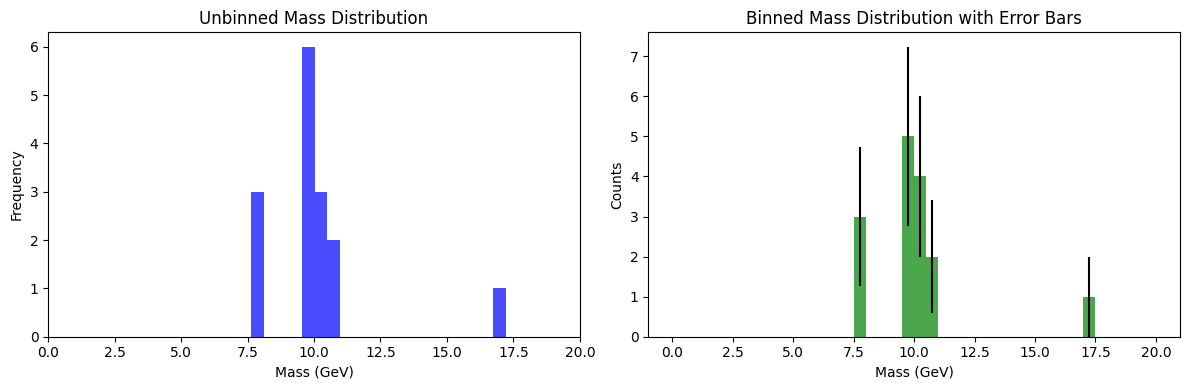

In [4]:
# @title a. Plot
# Plot the unbinned mass distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(mass, bins=(x_max-x_min), color='blue', alpha=0.7)
plt.xlim(x_min, x_max)
plt.xlabel('Mass (GeV)')
plt.ylabel('Frequency')
plt.title('Unbinned Mass Distribution')

# Plot the binned distribution with vertical error bars
plt.subplot(1, 2, 2)
plt.bar(bin_centers, hist, width=bin_size, color='green', yerr=errors, align='center', alpha=0.7)
plt.xlabel('Mass (GeV)')
plt.ylabel('Counts')
plt.title('Binned Mass Distribution with Error Bars')

plt.tight_layout()
plt.show()

# Task 2 Maximum Likelihood estimate (4 points)

In [5]:
# @title Functions
# Define the Cauchy PDF
def cauchy_pdf(x, mu, gamma):
    return 1 / (np.pi * gamma * (1 + ((x - mu) / gamma)**2))

# Define the negative log-likelihood function (to minimize)
def negative_log_likelihood(params, data):
    mu, gamma = params
    pdf_values = cauchy_pdf(data, mu, gamma)
    # Avoid taking the logarithm of very small or zero PDF values
    pdf_values = np.maximum(pdf_values, 1e-20)
    log_likelihood = -np.sum(np.log(pdf_values))
    return log_likelihood



In [6]:
# @title a. Build the functions
# Define the unbinned negative log-likelihood function
def unbinned_negative_log_likelihood(params, data):
    mu, gamma = params
    pdf_values = cauchy_pdf(data, mu, gamma)
    # Avoid taking the logarithm of very small or zero PDF values
    pdf_values = np.maximum(pdf_values, 1e-20)
    log_likelihood = -np.sum(np.log(pdf_values))
    return 2 * log_likelihood  # Multiply by -2 to obtain the NLL


In [7]:
# @title b. Find the estimates of µ and γ
# Initial guess for MLE
initial_guess = [np.median(mass), 1.0]  # You can adjust these initial values

# Perform MLE using SciPy's minimize function
result = minimize(unbinned_negative_log_likelihood, initial_guess, args=(mass,))

# Extract the MLE parameters
mle_mu, mle_gamma = result.x

# Print the estimated parameters
print(f"Estimated μ (median): {mle_mu:.2f}")
print(f"Estimated γ (scale): {mle_gamma:.2f}")

Estimated μ (median): 9.99
Estimated γ (scale): 0.41


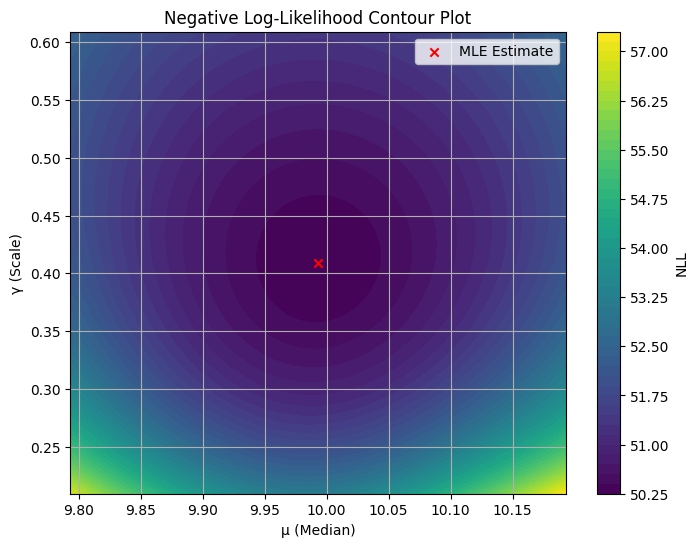

In [8]:
# @title c. Create the contour plot
range_ = 0.2
number_of = 100

# Define the range of values for µ and γ centered around MLE estimates
mu_range = np.linspace(mle_mu - range_, mle_mu + range_, number_of)
gamma_range = np.linspace(mle_gamma - range_, mle_gamma + range_, number_of)

# Create a grid of (µ, γ) values
mu_values, gamma_values = np.meshgrid(mu_range, gamma_range)

# Calculate NLL for each (µ, γ) pair
nll_values = np.zeros_like(mu_values)

for i in range(len(mu_range)):
    for j in range(len(gamma_range)):
        params = [mu_range[i], gamma_range[j]]
        nll_values[j, i] = unbinned_negative_log_likelihood(params, mass)  # Note the order of indices


# Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(mu_values, gamma_values, nll_values, levels=50, cmap='viridis')
plt.colorbar(contour, label='NLL')

# Plot the MLE estimates as a point
plt.scatter(mle_mu, mle_gamma, c='red', marker='x', label='MLE Estimate')

plt.xlabel('µ (Median)')
plt.ylabel('γ (Scale)')
plt.title('Negative Log-Likelihood Contour Plot')
plt.legend()
plt.grid()

plt.show()

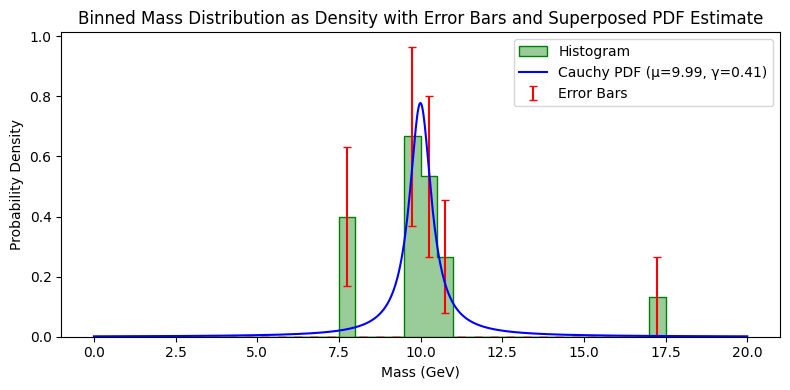

In [9]:
# @title d. Plot the histogram and the Cauchy distribution
# Best-fit parameters (m0 and Γ0) obtained from MLE
m0 = mle_mu
Gamma0 = mle_gamma

# Create a range of x values for the plot
x_range = np.linspace(0, 20, 1000)  # Adjust the range as needed

# Calculate the PDF values using the best-fit parameters
pdf_values = cauchy_pdf(x_range, m0, Gamma0)

# Define the bin edges and bin size
x_max = 20
x_min = 0
bin_size = 0.5
bin_edges = np.arange(x_min, x_max + bin_size, bin_size)  # Create bins from 0 to 20 GeV with a step of 0.5 GeV

# Create a histogram with the specified bins
hist, bin_edges = np.histogram(mass, bins=bin_edges)

# Calculate the bin centers
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Calculate the vertical error bars (square root of the counts in each bin for Poisson statistics)
errors = np.sqrt(hist)

# Normalize the histogram to density
bin_width = bin_size
hist_density = hist / (np.sum(hist) * bin_width)

# Calculate the normalized errors
errors_density = errors / (np.sum(hist) * bin_width)

# Create a Seaborn histogram with density plot
plt.figure(figsize=(8, 4))
sns.histplot(data=mass, bins=bin_edges, stat='density',color='green', label='Histogram', element="step", alpha=0.4)
plt.errorbar(bin_centers, hist_density, yerr=errors_density, linestyle='None', color='red', capsize=3, label='Error Bars')

# Superpose the PDF with best-fit parameters
plt.plot(x_range, pdf_values, color='blue', label=f'Cauchy PDF (μ={m0:.2f}, γ={Gamma0:.2f})')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability Density')
plt.title('Binned Mass Distribution as Density with Error Bars and Superposed PDF Estimate')
plt.legend()

plt.tight_layout()
plt.show()

# Task 3 Maximum Likelihood vs Chi2 method (3 points)

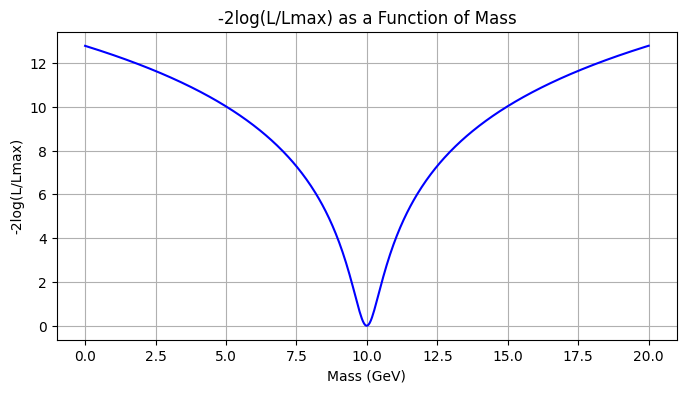

In [10]:
num_of_tries_ = 500

# Define the range of mass values you want to consider
mass_range = np.linspace(x_min, x_max, num_of_tries_)

# Initialize an empty array to store the -2log(L/Lmax) values
nll_ratio_values = []

# Calculate the maximum likelihood for the best-fit parameters
pdf_max_likelihood = cauchy_pdf(mass_range, m0, Gamma0).max()

# Calculate -2log(L/Lmax) for each mass value in the range
for mass_value in mass_range:
    pdf_value = cauchy_pdf(mass_value, m0, Gamma0)
    nll_ratio = -2 * np.log(pdf_value / pdf_max_likelihood)
    nll_ratio_values.append(nll_ratio)

# Plot -2log(L/Lmax) as a function of mass
plt.figure(figsize=(8, 4))
plt.plot(mass_range, nll_ratio_values, color='blue')
plt.xlabel('Mass (GeV)')
plt.ylabel('-2log(L/Lmax)')
plt.title('-2log(L/Lmax) as a Function of Mass')
plt.grid()

plt.show()

In [11]:
# Create a histogram
hist, bin_edges = np.histogram(mass, bins=np.arange(x_min, x_max + bin_size, bin_size), density=True)

# Calculate the expected values for each bin based on the Cauchy distribution
x = 0.5 * (bin_edges[1:] + bin_edges[:-1])
expected_values = len(mass) * bin_size * cauchy.pdf(x, loc=m0, scale=Gamma0)

# Calculate the Chi-squared values for each bin
chi2_values = ((hist - expected_values) ** 2 / expected_values)
total_chi2 = np.sum(chi2_values)
min_chi2 = np.min(chi2_values)

print("Total χ² =", total_chi2)

Total χ² = 12.473662287867421


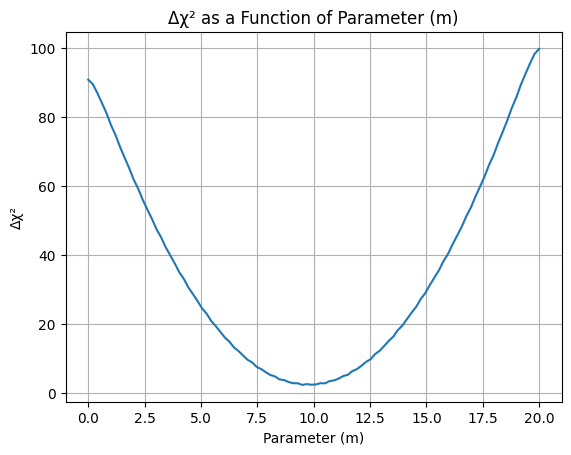

In [12]:
# @title b. Construct a Δχ² plot
# Define the parameter range to scan
parameter_values = np.linspace(x_min, x_max, 100)  # Example range

# Initialize variables to keep track of the minimum Chi-squared value and the corresponding parameter value
min_chi2 = float('inf')
best_parameter = None

for parameter in parameter_values:
    # Create a histogram
    hist, bin_edges = np.histogram(mass, bins=np.arange(x_min, x_max + bin_size, bin_size), density=True)

    # Calculate the expected values for each bin based on the Cauchy distribution with the current parameter
    x = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    expected_values = len(mass) * bin_size * cauchy.pdf(x, loc=parameter, scale=np.std(mass))

    # Calculate the Chi-squared values for each bin
    chi2_values = ((hist - expected_values) ** 2 / expected_values)
    total_chi2 = np.sum(chi2_values)

    # Check if this parameter value results in a lower Chi-squared value
    if total_chi2 < min_chi2:
        min_chi2 = total_chi2
        best_parameter = parameter

# Define the parameter range
parameter_values = np.linspace(x_min, x_max, 100)  # Range between x_min and x_max

# Initialize variables to keep track of the minimum Chi-squared value and the corresponding parameter value
best_parameter = None

# Initialize lists to store the Δχ² values and parameter values
delta_chi2_values = []
parameter_scan_values = []

# Calculate χ²min
for parameter in parameter_values:
    # Create a histogram
    hist, bin_edges = np.histogram(mass, bins=np.arange(x_min, x_max + bin_size, bin_size), density=True)

    # Calculate the expected values for each bin based on the Cauchy distribution with the current parameter
    x = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    expected_values = len(mass) * bin_size * cauchy.pdf(x, loc=parameter, scale=Gamma0)

    # Calculate the Chi-squared values for each bin
    chi2_values = ((hist - expected_values) ** 2 / expected_values)
    total_chi2 = np.sum(chi2_values)

    # Calculate Δχ² = χ² - χ²min
    delta_chi2 = total_chi2 - min_chi2

    # Append values to the lists
    delta_chi2_values.append(delta_chi2)
    parameter_scan_values.append(parameter)

# Plot Δχ² as a function of m
plt.plot(parameter_scan_values, delta_chi2_values)
plt.xlabel('Parameter (m)')
plt.ylabel('Δχ²')
plt.title('Δχ² as a Function of Parameter (m)')
plt.grid()
plt.show()

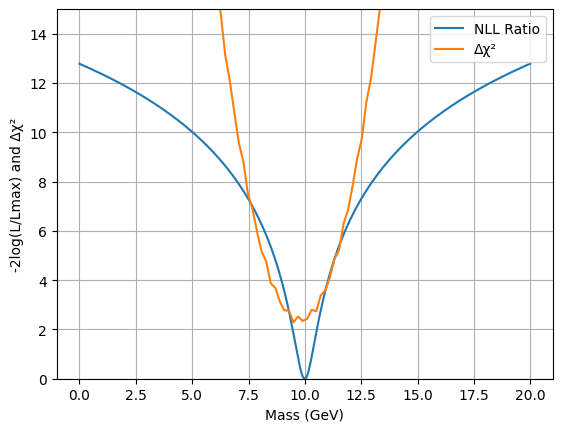

In [13]:
# @title c. Plot Δχ² and the NLL ratio
plt.plot(mass_range, nll_ratio_values, label='NLL Ratio')
plt.xlabel('Mass (GeV)')
plt.ylabel('-2log(L/Lmax) and Δχ²')
plt.plot(parameter_scan_values, delta_chi2_values, label='Δχ²')
plt.legend()
plt.grid()
plt.ylim(0,15)
plt.show()